In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
df = pd.read_csv("Measurements.csv")

In [4]:
df['speed'] = df['distance'] / df['time']

In [5]:
display(df.shape)
display(df.dtypes)

(55, 5)

time        float64
distance    float64
material     object
density     float64
speed       float64
dtype: object

In [6]:
# Create dataframe with averaged data for speed and distance
averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()

C:\Users\lukas\AppData\Local\Temp\ipykernel_4736\2309101954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()


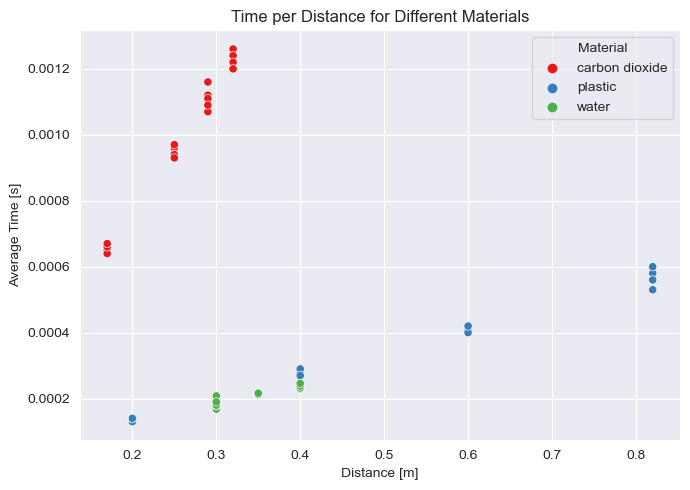

In [34]:
# Create subplots with two plots (line plot and boxplot) side by side
plt.figure(figsize = (7, 5))

# Plot 1: Scatterplot (average time per distance) with linear regression
sns.scatterplot(data=df, x='distance', y='time', hue='material', marker='o', palette='Set1')
plt.xlabel('Distance [m]')
plt.ylabel('Average Time [s]')
plt.title('Time per Distance for Different Materials')
plt.legend(title="Material", loc="best")

# Adjust the layout of subplots
plt.tight_layout()

# Show the plots
plt.show()

Regression Coefficients for carbon dioxide: Intercept = 8.031558185403746e-06, Slope = 0.003792110453648916
Regression Coefficients for plastic: Intercept = -5.049458313706782e-06, Slope = 0.0006961375412152614
Regression Coefficients for water: Intercept = 2.1533333333333468e-05, Slope = 0.0005479999999999997


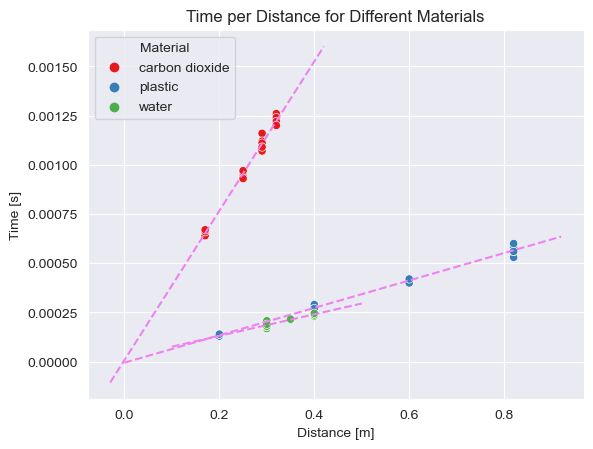

In [38]:

# Get unique material values
materials = df['material'].unique()

# Plot 1: Line plot (average time per distance)
sns.scatterplot(data=df, x='distance', y='time', hue='material', marker='o', palette='Set1')
plt.xlabel('Distance [m]')
plt.ylabel('Time [s]')
plt.title('Time per Distance for Different Materials')
plt.legend(title="Material", loc="upper left")

# Create three separate plots for each material
for material in materials:
    material_df = df[df['material'] == material]

    # Fit a linear regression model to the data points
    x = material_df['distance'].values.reshape(-1, 1)
    y = material_df['time'].values

    regressor = LinearRegression()
    regressor.fit(x, y)

    # Plot the regression line
    x_values = np.linspace(material_df['distance'].min()-0.2, material_df['distance'].max()+0.1, 100)
    y_pred = regressor.predict(x_values.reshape(-1, 1))


    y_pred_deviation = regressor.predict(x)

    
    plt.plot(x_values, y_pred, linestyle='--', color='violet', label='Regression Line')
    print(f'Regression Coefficients for {material}: Intercept = {regressor.intercept_}, Slope = {regressor.coef_[0]}')


C:\Users\lukas\AppData\Local\Temp\ipykernel_4736\100480076.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averaged_material_df = df.groupby(['material'])['speed', 'density'].mean().reset_index()


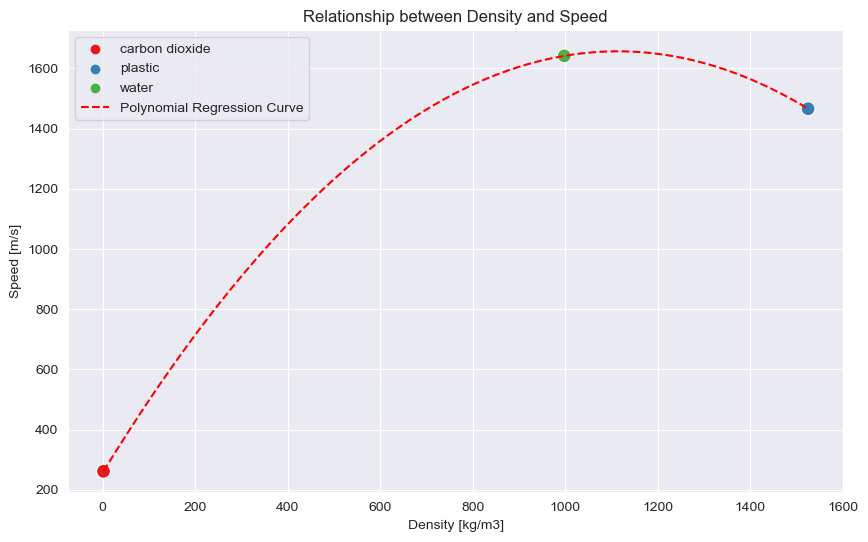

Regression Coefficients: Intercept = 256.99624539151046, Coefficients = [ 0.00000000e+00  2.51420595e+00 -1.12880759e-03]


In [9]:
# Create a dataframe with average Speed per amterial
averaged_material_df = df.groupby(['material'])['speed', 'density'].mean().reset_index()

# Create a scatterplot
plt.figure(figsize=(10, 6))

sns.scatterplot(data=averaged_material_df, x='density', y='speed', hue='material', palette='Set1', s=100)
plt.xlabel('Density [kg/m3]')
plt.ylabel('Speed [m/s]')
plt.title('Relationship between Density and Speed')

# Fit a polynomial regression model to the data points
X = df['density'].values.reshape(-1, 1)
y = df['speed'].values

# Define the degree of the polynomial
degree = 2  # You can adjust the degree as needed

poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

regressor = LinearRegression()
regressor.fit(X_poly, y)

# Generate values for the curve
x_values = np.linspace(df['density'].min(), df['density'].max(), 100)
x_values_poly = poly_features.transform(x_values.reshape(-1, 1))
y_values = regressor.predict(x_values_poly)

# Plot the regression curve
plt.plot(x_values, y_values, linestyle='--', color='red', label='Polynomial Regression Curve')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print regression coefficients
print(f'Regression Coefficients: Intercept = {regressor.intercept_}, Coefficients = {regressor.coef_}')